# This code is to draw plots and generate tables

In [ ]:
from chemocommons import * # Plz put it into the path with the notebook
import scipy.io as scio
import scipy.stats as ss


from skmultilearn.cluster import NetworkXLabelGraphClusterer
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.problem_transform import ClassifierChain, LabelPowerset
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import jaccard_similarity_score


data_dict = scio.loadmat("ATC_42_3883.mat")
X = data_dict['atc_fea'] # X is standardized [0, 1] no need for scale
Y = data_dict['atcClass']
Y[Y==-1] = 0


# cause it is matlab format??
X = X.T
Y = Y.T 

Y = pd.DataFrame(Y)

In [32]:
Y.rename(columns=lambda x: "ATC_category_" + str(x+1), inplace=True)

In [69]:
# Plz try to save the results as TableS1
for i in label_count:
    for j in label_count:
        length = len(set(i) & set(j))
        if length > 0 and label_count.index(i) > label_count.index(j):
            print(label_count.index(i) + 1, label_count.index(j) + 1, length, sep=",")

2,1,31
3,1,56
3,2,4
4,1,95
4,2,16
4,3,73
5,1,25
5,2,2
5,3,12
5,4,48
6,1,53
6,3,54
6,4,62
7,1,34
7,2,5
7,4,65
7,5,25
8,4,5
8,5,10
9,1,3
9,3,11
9,4,8
9,5,13
9,8,1
10,1,9
10,2,7
10,3,16
10,4,14
10,5,8
10,9,2
11,1,6
11,2,1
11,4,13
11,5,11
11,7,6
11,10,1
12,1,65
12,2,14
12,3,64
12,4,123
12,5,7
12,6,41
12,7,3
12,9,4
12,10,13
12,11,1
13,1,98
13,2,14
13,3,93
13,4,149
13,5,17
13,6,54
13,7,89
13,8,1
13,9,23
13,10,25
13,11,2
13,12,106
14,1,4
14,2,7
14,3,4
14,4,4
14,6,6
14,10,2
14,12,4
14,13,10


In [39]:
correlation_matrix = np.zeros(shape=(Y.shape[1], Y.shape[1]))
for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
        confusion_matrix = pd.crosstab(Y.iloc[:, i], Y.iloc[:, j])
        correlation_matrix[i, j] = cramers_corrected_stat(confusion_matrix)

In [32]:
import seaborn as sns; sns.set()

In [40]:
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix.columns = Y.columns
correlation_matrix.index = Y.columns

In [47]:
correlation_matrix.to_csv("correlation.csv") # OK, it is the TableS2, u got it!

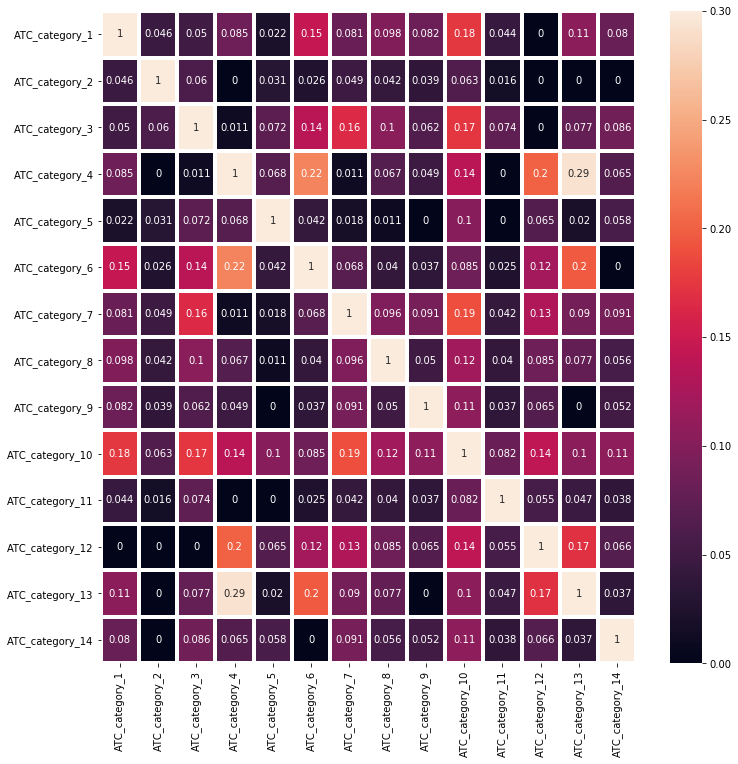

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,linewidths=3, annot=True, vmax=0.3)
#plt.yticks(rotation=30)
#plt.xticks(rotation=30)
plt.savefig("cram_v.tiff", dpi=300)